In [3]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

# Purpose
(Step 4.) EDA on filtered data and prepare for analysis

In [31]:
ROOT_DIR = Path.cwd().parent
DATA_DIR = ROOT_DIR / "data" 
RAW_DATA_DIR = DATA_DIR / "raw"
CSV_DATA_DIR = DATA_DIR / "to_csv"
FILTERED_DATA_DIR = DATA_DIR / "filtered"
TXT_DATA_DIR = RAW_DATA_DIR / "20210901"
MAIN_TXT_DATA_DIR = TXT_DATA_DIR / "main"


print(ROOT_DIR)
print(DATA_DIR)
print(FILTERED_DATA_DIR)

/Users/franktcao/local/workspace/machine_learning/databae
/Users/franktcao/local/workspace/machine_learning/databae/data
/Users/franktcao/local/workspace/machine_learning/databae/data/filtered


In [15]:
# import itertools
# list(itertools.product([0, 1], repeat=3))

In [32]:
table_names = [
  "ADR",
  "DEMO",
  "DRUG",
  "FOLLOWUP",
  "IND",
  "LINK",
  "OUT",
  "SRCE",
]

In [33]:
tables = {
  table_name: pd.read_csv(FILTERED_DATA_DIR / f"{table_name}.csv", index_col=0) for table_name in table_names
}

In [57]:
for name, table in tables.items():
  print(f"\n\n\n# {name} count: {len(table):,}")
  display(table.head())
  display(table.describe())
  display(table.info())
  print("\nDuplicated")
  display(table[table.duplicated()])




# ADR count: 257,645


,UMCReportId,Adr_Id,MedDRA_Id,Outcome
1044,14226956,1054,10033645,6.0
1400,4742330,1395,10000081,6.0
1401,4742330,1399,10024574,6.0
1402,4742330,1401,10002016,6.0
1403,4742330,1405,10033645,6.0


,UMCReportId,Adr_Id,MedDRA_Id,Outcome
count,2.576450e+05,2.576450e+05,2.576450e+05,192659.000000
mean,1.400414e+07,3.272921e+07,1.001976e+07,4.151189
std,9.986703e+06,1.920501e+07,3.006767e+05,2.170257
min,3.445000e+03,1.054000e+03,0.000000e+00,1.000000
25%,6.276816e+06,1.614091e+07,1.001378e+07,2.000000
50%,1.122410e+07,3.233821e+07,1.003364e+07,6.000000
75%,2.122924e+07,4.908448e+07,1.003560e+07,6.000000
max,3.793698e+07,6.680234e+07,1.008532e+07,8.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 257645 entries, 1044 to 66802335
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UMCReportId  257645 non-null  int64  
 1   Adr_Id       257645 non-null  int64  
 2   MedDRA_Id    257645 non-null  int64  
 3   Outcome      192659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 9.8 MB


None


Duplicated


,UMCReportId,Adr_Id,MedDRA_Id,Outcome





# DEMO count: 71,182


,UMCReportId,AgeGroup,Gender,DateDatabase,Type,Region,FirstDateDatabase
571,14226956,9,NaN,20150813,1.0,2,20150813
717,4742330,3,1.0,19990308,1.0,2,19990308
753,4742361,6,2.0,19990308,1.0,2,19990308
967,26873179,5,1.0,20190418,1.0,2,20190418
1576,15807743,9,2.0,20160126,1.0,4,20160126


,UMCReportId,AgeGroup,Gender,DateDatabase,Type,Region,FirstDateDatabase
count,7.118200e+04,71182.000000,66510.000000,7.118200e+04,70503.000000,71182.000000,7.118200e+04
mean,1.358452e+07,6.831348,1.499669,2.011681e+07,1.119399,2.865612,2.011453e+07
std,1.005251e+07,1.716363,0.527314,7.639482e+04,0.416309,1.239935,7.614510e+04
min,3.445000e+03,1.000000,0.000000,1.969090e+07,1.000000,1.000000,1.969090e+07
25%,5.701149e+06,6.000000,1.000000,2.009012e+07,1.000000,2.000000,2.008092e+07
50%,1.096702e+07,6.000000,2.000000,2.014043e+07,1.000000,2.000000,2.013092e+07
75%,2.096371e+07,9.000000,2.000000,2.017081e+07,1.000000,4.000000,2.017063e+07
max,3.793698e+07,9.000000,9.000000,2.021073e+07,5.000000,6.000000,2.021072e+07


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71182 entries, 571 to 27213383
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UMCReportId        71182 non-null  int64  
 1   AgeGroup           71182 non-null  int64  
 2   Gender             66510 non-null  float64
 3   DateDatabase       71182 non-null  int64  
 4   Type               70503 non-null  float64
 5   Region             71182 non-null  int64  
 6   FirstDateDatabase  71182 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 6.4 MB


None


Duplicated


,UMCReportId,AgeGroup,Gender,DateDatabase,Type,Region,FirstDateDatabase





# DRUG count: 291,734


,UMCReportId,Drug_Id,MedicinalProd_Id,DrecNo,Seq1,Seq2,Route,Basis,Amount,AmountU,Frequency,FrequencyU
1003,14226956,1010,1510210,57100,2,002,48.0,1.0,NaN,NaN,NaN,NaN
1397,4742330,1394,6547,286,1,001,NaN,2.0,NaN,NaN,NaN,804.0
1398,4742330,1397,16828,1462,1,007,NaN,2.0,NaN,NaN,NaN,804.0
1399,4742330,1398,15060,1138,1,001,NaN,2.0,NaN,NaN,NaN,804.0
1400,4742330,1400,9014,447,1,001,NaN,2.0,NaN,NaN,NaN,804.0


,UMCReportId,Drug_Id,MedicinalProd_Id,DrecNo,Seq1,Route,Basis,Amount,AmountU,Frequency,FrequencyU
count,2.917340e+05,2.917340e+05,2.917340e+05,291734.000000,291734.000000,165383.000000,291699.000000,112640.000000,113590.000000,65454.000000,97439.000000
mean,1.382834e+07,3.507704e+07,1.158834e+06,48191.914700,1.478364,51.276026,1.588278,256.444315,6.881196,1.406514,804.119921
std,9.810836e+06,2.011712e+07,1.193182e+06,155940.666181,1.488235,8.194294,0.496778,1833.406184,9.484414,0.979177,1.252841
min,3.445000e+03,1.010000e+03,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,801.000000
25%,6.438486e+06,1.829888e+07,4.155000e+04,1634.000000,1.000000,48.000000,1.000000,5.000000,3.000000,1.000000,804.000000
50%,1.111594e+07,3.462860e+07,1.251711e+06,9724.000000,1.000000,48.000000,2.000000,25.000000,3.000000,1.000000,804.000000
75%,2.106416e+07,5.166887e+07,1.508007e+06,16129.000000,2.000000,58.000000,2.000000,125.000000,3.000000,2.000000,804.000000
max,3.793698e+07,7.100680e+07,4.921772e+06,999999.000000,50.000000,68.000000,3.000000,80000.000000,32.000000,50.000000,813.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 291734 entries, 1003 to 71006799
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   UMCReportId       291734 non-null  int64  
 1   Drug_Id           291734 non-null  int64  
 2   MedicinalProd_Id  291734 non-null  int64  
 3   DrecNo            291734 non-null  int64  
 4   Seq1              291734 non-null  int64  
 5   Seq2              291734 non-null  object 
 6   Route             165383 non-null  float64
 7   Basis             291699 non-null  float64
 8   Amount            112640 non-null  float64
 9   AmountU           113590 non-null  float64
 10  Frequency         65454 non-null   float64
 11  FrequencyU        97439 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 28.9+ MB


None


Duplicated


,UMCReportId,Drug_Id,MedicinalProd_Id,DrecNo,Seq1,Seq2,Route,Basis,Amount,AmountU,Frequency,FrequencyU





# FOLLOWUP count: 33,661


,UMCReportId,ReplacedUMCReportId
334,15807732,15142867
1148,23712106,22134889
1310,23712558,22131910
1393,23712681,22132655
1482,30034812,25596842


,UMCReportId,ReplacedUMCReportId
count,3.366100e+04,3.366100e+04
mean,1.635060e+07,1.514798e+07
std,1.023336e+07,9.976323e+06
min,1.548500e+04,1.553400e+04
25%,7.839332e+06,6.901399e+06
50%,1.385151e+07,1.194759e+07
75%,2.546620e+07,2.424481e+07
max,3.793698e+07,3.793641e+07


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33661 entries, 334 to 7758830
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UMCReportId          33661 non-null  int64
 1   ReplacedUMCReportId  33661 non-null  int64
dtypes: int64(2)
memory usage: 788.9 KB


None


Duplicated


,UMCReportId,ReplacedUMCReportId





# IND count: 127,379


,Drug_Id,Indication
936,1943,Insomnia
2251,3889,Rheumatoid arthritis
2264,3899,Relapsing-remitting multiple sclerosis
2271,3935,Schizophrenia
4274,6881,Product used for unknown indication


,Drug_Id
count,1.273790e+05
mean,3.593596e+07
std,2.070160e+07
min,1.943000e+03
25%,1.863674e+07
50%,3.537420e+07
75%,5.454660e+07
max,7.100680e+07


<class 'pandas.core.frame.DataFrame'>
Int64Index: 127379 entries, 936 to 35474395
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Drug_Id     127379 non-null  int64 
 1   Indication  127378 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


None


Duplicated


,Drug_Id,Indication





# LINK count: 507,837


,Drug_Id,Adr_Id,Dechallenge1,Dechallenge2,Rechallenge1,Rechallenge2,TimeToOnsetMin,TimeToOnsetMax
1442,1010,1054,5.0,5.0,NaN,NaN,-,-
1898,1403,1395,5.0,4.0,4.0,3.0,-,-
1899,1403,1399,5.0,4.0,4.0,3.0,-,-
1900,1403,1401,5.0,4.0,4.0,3.0,-,-
1901,1403,1405,5.0,4.0,4.0,3.0,-,-


,Drug_Id,Adr_Id,Dechallenge1,Dechallenge2,Rechallenge1,Rechallenge2
count,5.078370e+05,5.078370e+05,470067.000000,456554.000000,123952.000000,123952.000000
mean,3.623433e+07,3.386390e+07,3.319257,3.534526,1.686669,2.970327
std,2.071155e+07,1.971122e+07,1.929967,1.749667,1.206201,0.451707
min,1.010000e+03,1.054000e+03,1.000000,1.000000,1.000000,1.000000
25%,1.878453e+07,1.711210e+07,1.000000,1.000000,1.000000,3.000000
50%,3.498272e+07,3.245140e+07,4.000000,5.000000,1.000000,3.000000
75%,5.502418e+07,5.204106e+07,5.000000,5.000000,3.000000,3.000000
max,7.100680e+07,6.680234e+07,6.000000,5.000000,4.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 507837 entries, 1442 to 99273717
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Drug_Id         507837 non-null  int64  
 1   Adr_Id          507837 non-null  int64  
 2   Dechallenge1    470067 non-null  float64
 3   Dechallenge2    456554 non-null  float64
 4   Rechallenge1    123952 non-null  float64
 5   Rechallenge2    123952 non-null  float64
 6   TimeToOnsetMin  507837 non-null  object 
 7   TimeToOnsetMax  507837 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 34.9+ MB


None


Duplicated


,Drug_Id,Adr_Id,Dechallenge1,Dechallenge2,Rechallenge1,Rechallenge2,TimeToOnsetMin,TimeToOnsetMax





# OUT count: 58,674


,UMCReportId,Seriousness,Serious
566,14226956,6.0,Y
765,26873179,3.0,Y
1272,15807743,3.0,Y
1280,15807732,3.0,Y
1285,15807756,3.0,Y


,UMCReportId,Seriousness
count,5.867400e+04,54090.000000
mean,1.556727e+07,3.746108
std,9.853116e+06,1.573824
min,3.445000e+03,1.000000
25%,7.091561e+06,3.000000
50%,1.314721e+07,3.000000
75%,2.319378e+07,6.000000
max,3.793698e+07,6.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58674 entries, 566 to 22666427
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UMCReportId  58674 non-null  int64  
 1   Seriousness  54090 non-null  float64
 2   Serious      58667 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ MB


None


Duplicated


,UMCReportId,Seriousness,Serious





# SRCE count: 59,438


,UMCReportId,Type
367,14226956,5
489,4742330,1
637,26873179,5
1227,15807743,5
1235,15807732,1


,UMCReportId,Type
count,5.943800e+04,59438.000000
mean,1.467071e+07,2.305091
std,1.004734e+07,1.620763
min,3.445000e+03,1.000000
25%,6.365381e+06,1.000000
50%,1.234926e+07,1.000000
75%,2.239129e+07,3.000000
max,3.793698e+07,5.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59438 entries, 367 to 21105029
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   UMCReportId  59438 non-null  int64
 1   Type         59438 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


None


Duplicated


,UMCReportId,Type


In [45]:
# Demo for this data only has unique values

In [46]:
demo = tables["DEMO"]
demo["UMCReportId"].duplicated().sum()

0

<AxesSubplot:xlabel='Count', ylabel='AgeGroup'>

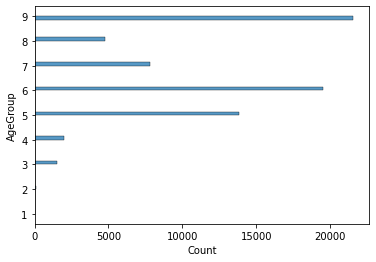

In [52]:
# demo.hist()
sns.histplot(data=demo, y="AgeGroup")

<AxesSubplot:xlabel='Count', ylabel='Gender'>

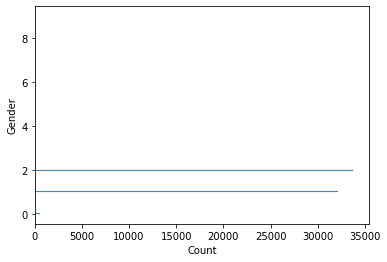

In [53]:
sns.histplot(data=demo, y="Gender")

In [58]:
demo["Gender"].value_counts()

2.0    33770
1.0    32104
0.0      625
9.0       11
Name: Gender, dtype: int64

<AxesSubplot:ylabel='DateDatabase'>

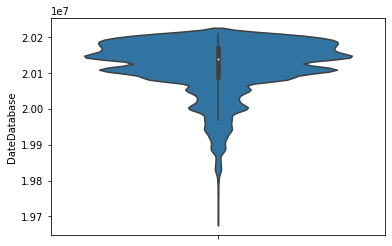

In [54]:
sns.violinplot(data=demo, y="DateDatabase")

In [24]:
table.describe()

,UMCReportId,Type
count,5.943800e+04,59438.000000
mean,1.467071e+07,2.305091
std,1.004734e+07,1.620763
min,3.445000e+03,1.000000
25%,6.365381e+06,1.000000
50%,1.234926e+07,1.000000
75%,2.239129e+07,3.000000
max,3.793698e+07,5.000000


In [25]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59438 entries, 367 to 21105029
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   UMCReportId  59438 non-null  int64
 1   Type         59438 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [26]:
table.duplicated().sum()

0

In [27]:
table.isnull()

,UMCReportId,Type
367,False,False
489,False,False
637,False,False
1227,False,False
1235,False,False
...,...,...
21102991,False,False
21103318,False,False
21104562,False,False
21104727,False,False


In [28]:
tables["OUT"]["Serious"].value_counts()

Y    56514
N     2153
Name: Serious, dtype: int64

In [29]:
tables["OUT"]["Seriousness"].value_counts().sort_index()

1.0     3217
2.0     2836
3.0    31331
4.0      241
5.0        9
6.0    16456
Name: Seriousness, dtype: int64


# Weird... Not serious but 2 Deaths, 1 Life Threatening, and 1 Caused/Prolonged Hospitalization?

In [30]:
test = out[out["Serious"] == "N"].dropna()
test["Seriousness"] = test["Seriousness"].astype(int)
test[["UMCReportId", "Serious", "Seriousness"]]

NameError: name 'out' is not defined

In [33]:
out = tables["OUT"]
out[out["Serious"] == "N"]["Seriousness"].value_counts().sort_index()

1.0    2
2.0    1
3.0    1
Name: Seriousness, dtype: int64